In [40]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [41]:
df1 = pd.read_csv("D:\Data Scrape Renote11\dataset-renot11\satu.csv")
df2 = pd.read_csv("D:\Data Scrape Renote11\dataset-renot11\dua.csv")
df3 = pd.read_csv("D:\Data Scrape Renote11\dataset-renot11\-tiga.csv")
df4 = pd.read_csv("D:\Data Scrape Renote11\dataset-renot11\empat.csv")
df5 = pd.read_csv("D:\Data Scrape Renote11\dataset-renot11\lima.csv")
df6 = pd.read_csv("D:\Data Scrape Renote11\dataset-renot11\enam.csv")


In [42]:
df = pd.concat([df1, df2, df3, df4, df5, df6])

In [43]:
pd.options.display.max_rows=10 #mengubah setingan default max rows, sesuaikan dg kebutuhan
pd.options.display.max_colwidth=1000
df #cek data per baris 60, apa ada masalah header

,#,Product Name,Product URL,Price,Category,Reviews,Sold,Views,Rating,Seller Name,Seller URL,Location,Error
0,1,XIAOMI REDMI NOTE 4X 4/64GB,https://www.tokopedia.com/daystoresid/xiaomi-redmi-note-4x-4-64gb,905000,Android OS,7,33,5356,4.4,daystore_id,https://www.tokopedia.com/daystoresid,Jakarta Pusat,False
1,2,Redmi Note 11 4/128 Gb New Garansi Resmi,https://www.tokopedia.com/archive-bilqissaditya/redmi-note-11-4-128-gb-new-garansi-resmi,2430000,Android OS,67,211,1247,5.0,Century Fast,https://www.tokopedia.com/archive-bilqissaditya,Kota Surakarta,False
2,3,Redmi Note 11 4/128 GB Garansi Resmi Xiaomi Indonesia - READY,https://www.tokopedia.com/newsantbrinashop/redmi-note-11-4-128-gb-garansi-resmi-xiaomi-indonesia-ready,2440000,Android OS,35,134,1068,5.0,NewSantBrina Shop,https://www.tokopedia.com/newsantbrinashop,Kota Surakarta,False
3,4,Xiaomi Redmi Note 11 4/128 GB Garansi Resmi - Twilight Blue,https://www.tokopedia.com/abiansimon/xiaomi-redmi-note-11-4-128-gb-garansi-resmi-twilight-blue,2459000,Android OS,24,87,620,5.0,Abian Simon Official,https://www.tokopedia.com/abiansimon,Kota Surakarta,False
4,5,Redmi Note 11 4/128 Gb garansi resmi - Star blue,https://www.tokopedia.com/maritsa22/redmi-note-11-4-128-gb-garansi-resmi-star-blue,2435000,Android OS,31,123,600,5.0,maritsa_store,https://www.tokopedia.com/maritsa22,Kab. Karanganyar,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,57,XIAOMI REDMI NOTE 11 4Gb 128Gb,https://www.tokopedia.com/drsanga/xiaomi-redmi-note-11-4gb-128gb,2599000,Android OS,0,0,15,0.0,Sembilan Cell & Computer,https://www.tokopedia.com/drsanga,Kab. Cilacap,False
57,58,Redmi Note 11 4/128 Ram 4gb internal 128gb Garansi Resmi,https://www.tokopedia.com/x9phone/redmi-note-11-4-128-ram-4gb-internal-128gb-garansi-resmi,2450000,Android OS,0,0,28,0.0,X9 Phone,https://www.tokopedia.com/x9phone,Kab. Banyumas,False
58,59,REDMI NOTE 11 4/128 GB NFC Snapdragon 680 Amoled Garansi Resmi Xiaomi - Graphite Grey,https://www.tokopedia.com/siangmalam/redmi-note-11-4-128-gb-nfc-snapdragon-680-amoled-garansi-resmi-xiaomi-graphite-grey,2470000,Android OS,0,0,26,0.0,Siang_malam_,https://www.tokopedia.com/siangmalam,Kota Bekasi,False
59,60,(GRATIS ONGKIR) Xiaomi Redmi Note 11 (4Gb+128GB) Garansi Resmi,https://www.tokopedia.com/goodmerchant/gratis-ongkir-xiaomi-redmi-note-11-4gb-128gb-garansi-resmi,2390000,Android OS,0,0,29,0.0,Good Merchant,https://www.tokopedia.com/goodmerchant,Kota Tangerang,False


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 0 to 60
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   #             338 non-null    int64  
 1   Product Name  338 non-null    object 
 2   Product URL   338 non-null    object 
 3   Price         338 non-null    int64  
 4   Category      338 non-null    object 
 5   Reviews       338 non-null    int64  
 6   Sold          338 non-null    int64  
 7   Views         338 non-null    int64  
 8   Rating        338 non-null    float64
 9   Seller Name   338 non-null    object 
 10  Seller URL    338 non-null    object 
 11  Location      338 non-null    object 
 12  Error         338 non-null    bool   
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 26.7+ KB


In [46]:
# cek baris kosong
df.isnull().sum()

#               0
Product Name    0
Product URL     0
Price           0
Category        0
               ..
Rating          0
Seller Name     0
Seller URL      0
Location        0
Error           0
Length: 13, dtype: int64

<AxesSubplot:ylabel='Density'>

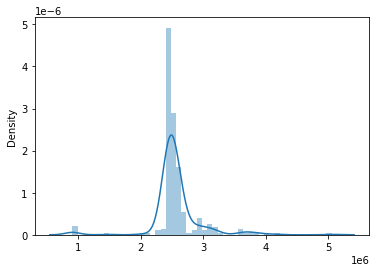

In [47]:
# cek gambaran umum data berdasar harga
df_price = df.loc[:, ['Price']]
sns.distplot(df_price.sort_values(by=['Price'], ascending=True, axis=0))

In [48]:
# dari distplot terlihat ada outlier
# lihat seluruh harga yang diurutkan
df_price = df.sort_values(by=['Price'], ascending=True, axis=0)
df_price

,#,Product Name,Product URL,Price,Category,Reviews,Sold,Views,Rating,Seller Name,Seller URL,Location,Error
0,1,XIAOMI REDMI NOTE 4X 4/64GB,https://www.tokopedia.com/daystoresid/xiaomi-redmi-note-4x-4-64gb,905000,Android OS,7,33,5356,4.4,daystore_id,https://www.tokopedia.com/daystoresid,Jakarta Pusat,False
0,1,XIAOMI REDMI NOTE 4X 4/64GB,https://www.tokopedia.com/daystoresid/xiaomi-redmi-note-4x-4-64gb,905000,Android OS,7,33,5356,4.4,daystore_id,https://www.tokopedia.com/daystoresid,Jakarta Pusat,False
0,1,XIAOMI REDMI NOTE 4X 4/64GB,https://www.tokopedia.com/daystoresid/xiaomi-redmi-note-4x-4-64gb,905000,Android OS,7,33,5356,4.4,daystore_id,https://www.tokopedia.com/daystoresid,Jakarta Pusat,False
0,1,XIAOMI REDMI NOTE 4X 4/64GB,https://www.tokopedia.com/daystoresid/xiaomi-redmi-note-4x-4-64gb,905000,Android OS,7,33,5356,4.4,daystore_id,https://www.tokopedia.com/daystoresid,Jakarta Pusat,False
0,1,XIAOMI REDMI NOTE 4X 4/64GB,https://www.tokopedia.com/daystoresid/xiaomi-redmi-note-4x-4-64gb,905000,Android OS,7,33,5356,4.4,daystore_id,https://www.tokopedia.com/daystoresid,Jakarta Pusat,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,22,Xiaomi Redmi Note 11 Ram 4 Gb 6 Gb Internal 128 Gb NFC Garansi Resmi,https://www.tokopedia.com/hinatasel/xiaomi-redmi-note-11-ram-4-gb-6-gb-internal-128-gb-nfc-garansi-resmi,3818000,Android OS,0,0,0,0.0,hinatasel shop,https://www.tokopedia.com/hinatasel,Jakarta Selatan,False
15,16,XIAOMI REDMI NOTE 11 NFC 4GB+128GB - 6GB+128GB [ESPANSI RAM 6GB+2GB] - Grey 4/128,https://www.tokopedia.com/rakkabuming/xiaomi-redmi-note-11-nfc-4gb-128gb-6gb-128gb-espansi-ram-6gb-2gb-grey-4-128,3863000,Android OS,0,0,0,0.0,Rakkabuming,https://www.tokopedia.com/rakkabuming,Jakarta Barat,False
11,12,Note Xiaomi 1 - 4 128GB Tahun 6 128GB Redmi Garansi 11,https://www.tokopedia.com/archive-jkewek-1632494736/note-xiaomi-1-4-128gb-tahun-6-128gb-redmi-garansi-11,4000620,Android OS,0,0,2,0.0,jkewek,https://www.tokopedia.com/archive-jkewek-1632494736,Kota Banjarmasin,False
27,28,SALE REDMI NOTE 11 4/128 GARANSI RESMI NEW,https://www.tokopedia.com/angeltoko2/sale-redmi-note-11-4-128-garansi-resmi-new,4159000,Android OS,0,0,0,0.0,angel toko2,https://www.tokopedia.com/angeltoko2,Jakarta Barat,False


In [49]:
# dari hasil di atas terlihat ada beberapa produk yang tidak kita ingingkan(noisy data)
# gambaran umum data berdasar nama produk

df_name = df.loc[:, ['Product Name']]
df_name.describe() #sepertinya ada produk lain selain xiaomi redmi note 11

,Product Name
count,338
unique,278
top,Xiaomi Redmi Note 11 4/128 GB Garansi Resmi
freq,11


In [50]:
#belum bisa disimpulkan terdapat 278 nama produk yang berbeda, karena produk yang sama memiliki kombinasi nama yang beda
#mencoba menyaring produk yang saya ingingkan, redmi note 11.
#karena satu produk memiliki banyak kombinasi, maka saya cari pattern yang sesuai dg produk dan kombinasinya

pat1 = r"[note][ ][11]" 
pat2 = r"[Note][ ][11]" 
pat3 = r"[NOTE][ ][11]" 

df_pat1 = df.loc[df['Product Name'].str.contains(pat1), ['Product Name','Price', 'Category', 'Seller Name', 'Location', 'Product URL']] 
df_pat2 = df.loc[df['Product Name'].str.contains(pat2), ['Product Name','Price', 'Category', 'Seller Name', 'Location', 'Product URL']]
df_pat3 = df.loc[df['Product Name'].str.contains(pat3), ['Product Name','Price', 'Category', 'Seller Name', 'Location', 'Product URL']]

df_filtered = pd.concat([df_pat1, df_pat3], ignore_index=True) #pat1 dan pat2 itu menghasilkan hal yang sama. lihat simulasi di bawah

pd.options.display.max_rows=10

df_filtered = df_filtered.sort_values(by=['Price'], axis=0, ascending=True)
df_filtered

,Product Name,Price,Category,Seller Name,Location,Product URL
143,"Infinix Hot 11 4/64 Bukan Redmi Note 9 9c 9t Poco M3 10 10s 6/128 - Warna Random, InfHot 11s 4/64",2000000,Android OS,Best Sale Shop,Kota Semarang,https://www.tokopedia.com/bestsale/infinix-hot-11-4-64-bukan-redmi-note-9-9c-9t-poco-m3-10-10s-6-128-warna-random-infhot-11s-4-64
219,Xiaomi Redmi Note 11 4GB+128GB - 6GB+128GB (Espansi Ram 6GB+2GB),2124150,Android OS,Sutar y,Jakarta Barat,https://www.tokopedia.com/sutary/xiaomi-redmi-note-11-4gb-128gb-6gb-128gb-espansi-ram-6gb-2gb
33,Redmi Note 11 4/128 Garansi Juni 2023 Like New Fullset Ori,2275000,Android OS,RIKORA,Kota Surakarta,https://www.tokopedia.com/rikora/redmi-note-11-4-128-garansi-juni-2023-like-new-fullset-ori
34,Redmi Note 11 4/128 Garansi Juni 2023 Like New Full Ori,2290000,Android OS,RIKORA,Kota Surakarta,https://www.tokopedia.com/rikora/redmi-note-11-4-128-garansi-juni-2023-like-new-full-ori
289,XIAOMI REDMI NOTE 11 RAM 4/128 GB GARANSI RESMI BNOB,2300000,Android OS,blitzzzzzz,Kota Surabaya,https://www.tokopedia.com/blitzzzzzz/xiaomi-redmi-note-11-ram-4-128-gb-garansi-resmi-bnob
...,...,...,...,...,...,...
164,Xiaomi Redmi Note 11 Pro Ram 8/128GB,3800000,Android OS,Dessy_Cell,Kota Depok,https://www.tokopedia.com/oyonkun/xiaomi-redmi-note-11-pro-ram-8-128gb
166,Xiaomi Redmi Note 11 Ram 4 Gb 6 Gb Internal 128 Gb NFC Garansi Resmi,3818000,Android OS,hinatasel shop,Jakarta Selatan,https://www.tokopedia.com/hinatasel/xiaomi-redmi-note-11-ram-4-gb-6-gb-internal-128-gb-nfc-garansi-resmi
293,XIAOMI REDMI NOTE 11 NFC 4GB+128GB - 6GB+128GB [ESPANSI RAM 6GB+2GB] - Grey 4/128,3863000,Android OS,Rakkabuming,Jakarta Barat,https://www.tokopedia.com/rakkabuming/xiaomi-redmi-note-11-nfc-4gb-128gb-6gb-128gb-espansi-ram-6gb-2gb-grey-4-128
298,SALE REDMI NOTE 11 4/128 GARANSI RESMI NEW,4159000,Android OS,angel toko2,Jakarta Barat,https://www.tokopedia.com/angeltoko2/sale-redmi-note-11-4-128-garansi-resmi-new


In [51]:
# masih terdapat produk yang tidak kita ingin, maka hapus
df_filtered = df_filtered.drop([143]) #hapus Infinix Hot 11 4/64 Bukan Redmi Note 9...
df_filtered

,Product Name,Price,Category,Seller Name,Location,Product URL
219,Xiaomi Redmi Note 11 4GB+128GB - 6GB+128GB (Espansi Ram 6GB+2GB),2124150,Android OS,Sutar y,Jakarta Barat,https://www.tokopedia.com/sutary/xiaomi-redmi-note-11-4gb-128gb-6gb-128gb-espansi-ram-6gb-2gb
33,Redmi Note 11 4/128 Garansi Juni 2023 Like New Fullset Ori,2275000,Android OS,RIKORA,Kota Surakarta,https://www.tokopedia.com/rikora/redmi-note-11-4-128-garansi-juni-2023-like-new-fullset-ori
34,Redmi Note 11 4/128 Garansi Juni 2023 Like New Full Ori,2290000,Android OS,RIKORA,Kota Surakarta,https://www.tokopedia.com/rikora/redmi-note-11-4-128-garansi-juni-2023-like-new-full-ori
289,XIAOMI REDMI NOTE 11 RAM 4/128 GB GARANSI RESMI BNOB,2300000,Android OS,blitzzzzzz,Kota Surabaya,https://www.tokopedia.com/blitzzzzzz/xiaomi-redmi-note-11-ram-4-128-gb-garansi-resmi-bnob
308,XIAOMI REDMI NOTE 11 NO REPACK,2360000,Android OS,NegroToko1,Kab. Tulungagung,https://www.tokopedia.com/negrotoko1/xiaomi-redmi-note-11-no-repack
...,...,...,...,...,...,...
164,Xiaomi Redmi Note 11 Pro Ram 8/128GB,3800000,Android OS,Dessy_Cell,Kota Depok,https://www.tokopedia.com/oyonkun/xiaomi-redmi-note-11-pro-ram-8-128gb
166,Xiaomi Redmi Note 11 Ram 4 Gb 6 Gb Internal 128 Gb NFC Garansi Resmi,3818000,Android OS,hinatasel shop,Jakarta Selatan,https://www.tokopedia.com/hinatasel/xiaomi-redmi-note-11-ram-4-gb-6-gb-internal-128-gb-nfc-garansi-resmi
293,XIAOMI REDMI NOTE 11 NFC 4GB+128GB - 6GB+128GB [ESPANSI RAM 6GB+2GB] - Grey 4/128,3863000,Android OS,Rakkabuming,Jakarta Barat,https://www.tokopedia.com/rakkabuming/xiaomi-redmi-note-11-nfc-4gb-128gb-6gb-128gb-espansi-ram-6gb-2gb-grey-4-128
298,SALE REDMI NOTE 11 4/128 GARANSI RESMI NEW,4159000,Android OS,angel toko2,Jakarta Barat,https://www.tokopedia.com/angeltoko2/sale-redmi-note-11-4-128-garansi-resmi-new


In [52]:
# dari hasil di atas kita tau mengapa ada produk dengan harga yang tidak umum, salah satunya karena terdapat produk yg tdk kita ingin(noisy data) salah satunya redmi note 11 pro, maka hapus
pat_pro1 = "Pro "

df_pro1 = df_filtered.loc[df_filtered['Product Name'].str.contains(pat_pro1), ['Product Name','Price', 'Category', 'Seller Name', 'Location', 'Product URL']]

pd.options.display.max_rows=10

df_pro1


,Product Name,Price,Category,Seller Name,Location,Product URL
119,Xiaomi Redmi Note 11 Pro 8GB + 128GB Garansi Resmi Xiaomi Indonesia - Polar White,3699000,Android OS,MEGA GADGET ELECTRONICS,Jakarta Utara,https://www.tokopedia.com/megagadgetelectronics/xiaomi-redmi-note-11-pro-8gb-128gb-garansi-resmi-xiaomi-indonesia-polar-white
164,Xiaomi Redmi Note 11 Pro Ram 8/128GB,3800000,Android OS,Dessy_Cell,Kota Depok,https://www.tokopedia.com/oyonkun/xiaomi-redmi-note-11-pro-ram-8-128gb


In [53]:
df_filtered = df_filtered.drop([119]) #Xiaomi Redmi Note 11 Pro 8GB + 128GB Garansi Resmi Xiaomi Indonesia - Polar White	
df_filtered = df_filtered.drop([164]) #Xiaomi Redmi Note 11 Pro Ram 8/128GB

pd.options.display.max_rows=10
df_filtered

,Product Name,Price,Category,Seller Name,Location,Product URL
219,Xiaomi Redmi Note 11 4GB+128GB - 6GB+128GB (Espansi Ram 6GB+2GB),2124150,Android OS,Sutar y,Jakarta Barat,https://www.tokopedia.com/sutary/xiaomi-redmi-note-11-4gb-128gb-6gb-128gb-espansi-ram-6gb-2gb
33,Redmi Note 11 4/128 Garansi Juni 2023 Like New Fullset Ori,2275000,Android OS,RIKORA,Kota Surakarta,https://www.tokopedia.com/rikora/redmi-note-11-4-128-garansi-juni-2023-like-new-fullset-ori
34,Redmi Note 11 4/128 Garansi Juni 2023 Like New Full Ori,2290000,Android OS,RIKORA,Kota Surakarta,https://www.tokopedia.com/rikora/redmi-note-11-4-128-garansi-juni-2023-like-new-full-ori
289,XIAOMI REDMI NOTE 11 RAM 4/128 GB GARANSI RESMI BNOB,2300000,Android OS,blitzzzzzz,Kota Surabaya,https://www.tokopedia.com/blitzzzzzz/xiaomi-redmi-note-11-ram-4-128-gb-garansi-resmi-bnob
308,XIAOMI REDMI NOTE 11 NO REPACK,2360000,Android OS,NegroToko1,Kab. Tulungagung,https://www.tokopedia.com/negrotoko1/xiaomi-redmi-note-11-no-repack
...,...,...,...,...,...,...
163,Xiaomi Redmi Note 11 NFC 4GB+128GB - 6GB+128GB [Espansi Ram 6GB+2GB] - Grey 4/128,3751000,Android OS,Chandrabhanu,Jakarta Timur,https://www.tokopedia.com/chandrabhanu/xiaomi-redmi-note-11-nfc-4gb-128gb-6gb-128gb-espansi-ram-6gb-2gb-grey-4-128
166,Xiaomi Redmi Note 11 Ram 4 Gb 6 Gb Internal 128 Gb NFC Garansi Resmi,3818000,Android OS,hinatasel shop,Jakarta Selatan,https://www.tokopedia.com/hinatasel/xiaomi-redmi-note-11-ram-4-gb-6-gb-internal-128-gb-nfc-garansi-resmi
293,XIAOMI REDMI NOTE 11 NFC 4GB+128GB - 6GB+128GB [ESPANSI RAM 6GB+2GB] - Grey 4/128,3863000,Android OS,Rakkabuming,Jakarta Barat,https://www.tokopedia.com/rakkabuming/xiaomi-redmi-note-11-nfc-4gb-128gb-6gb-128gb-espansi-ram-6gb-2gb-grey-4-128
298,SALE REDMI NOTE 11 4/128 GARANSI RESMI NEW,4159000,Android OS,angel toko2,Jakarta Barat,https://www.tokopedia.com/angeltoko2/sale-redmi-note-11-4-128-garansi-resmi-new


In [98]:
# dari hasil di atas, terdapat beberapa data yang memiliki nama produk yang membingungkan dan harganya tidak wajar

# gunakan ini untuk SIMULASI
pat1 = r"[note][ ][11]" 
pat2 = r"[Note][ ][11]" 
pat3 = r"[NOTE][ ][11]" 
pat4 = "Note 11" 
pat5 = "note 11"
pat6 = "NOTE 11"
pat7 = "pro"
pat8 = "Pro"
pat9 = "PRO"
pat10 = r"[ ][pro]"
pat11 = r"[ ][PRO]"

x = pd.Series(['note 11', 'Note 11', 'NOTE 11', 'redmi note 11 pro', ' Pro', ' PRO', 'anot'])
x.str.contains(pat11)


0    False
1    False
2    False
3    False
4     True
5     True
6    False
dtype: bool

<AxesSubplot:xlabel='Price', ylabel='Density'>

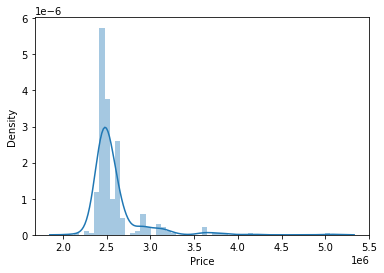

In [54]:
sns.distplot(df_filtered['Price'])

<AxesSubplot:>

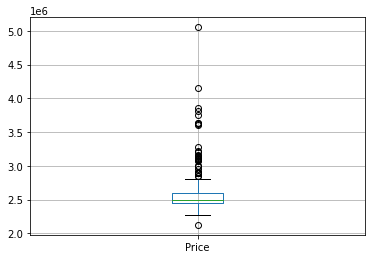

In [55]:
df_filtered.boxplot(column=['Price'], grid=True)

In [34]:
# dari gambar boxplot terlihat terdapat outlier
# melihat beberapa produk outlier harga tinggi

pd.options.display.max_rows=10
df_right_tail = df_filtered.loc[df_filtered['Price']>2750000, ['Product Name', 'Price', 'Category', 'Seller Name', 'Location', 'Product URL']]
df_right_tail.sort_values(by=['Price'], axis=0, ascending=True)

,Product Name,Price,Category,Seller Name,Location,Product URL
173,"Xiaomi Redmi Note 11 (4GB/128GB) & (6GB/128GB) Garansi Resmi Gratis - Biru, 4GB/128GB",2799000,Android OS,Kurnia Store Online,Kota Makassar,https://www.tokopedia.com/kurniastoreonline/xiaomi-redmi-note-11-4gb-128gb-6gb-128gb-garansi-resmi-gratis-biru-4gb-128gb
80,Redmi Note 11 (4GB+128GB),2850000,Android OS,Gadgets_Cell,Kab. Kulon Progo,https://www.tokopedia.com/gadgetcel/redmi-note-11-4gb-128gb
128,"redmi note 11 - Abu-abu, 6/128",2850000,Android OS,viaviacell,Kota Bandung,https://www.tokopedia.com/viaviacell/redmi-note-11-abu-abu-6-128
136,"Xiaomi Redmi Note 11 Ram 4GB Internal 128GB Garansi Resmi Indonesia - Random, 6GB 128GB",2890000,Android OS,Zal.Fa Shop,Kab. Tulungagung,https://www.tokopedia.com/zalfathurshop/xiaomi-redmi-note-11-ram-4gb-internal-128gb-garansi-resmi-indonesia-random-6gb-128gb
324,XIAOMI REDMI NOTE 11 - 4GB 128GB 4/128 SNAPDRAGON 680 - Graphite Gray - Graphite Gray,2899000,Android OS,SRY Garage,Kab. Sleman,https://www.tokopedia.com/srygarage/xiaomi-redmi-note-11-4gb-128gb-4-128-snapdragon-680-graphite-gray-graphite-gray
...,...,...,...,...,...,...
163,Xiaomi Redmi Note 11 NFC 4GB+128GB - 6GB+128GB [Espansi Ram 6GB+2GB] - Grey 4/128,3751000,Android OS,Chandrabhanu,Jakarta Timur,https://www.tokopedia.com/chandrabhanu/xiaomi-redmi-note-11-nfc-4gb-128gb-6gb-128gb-espansi-ram-6gb-2gb-grey-4-128
166,Xiaomi Redmi Note 11 Ram 4 Gb 6 Gb Internal 128 Gb NFC Garansi Resmi,3818000,Android OS,hinatasel shop,Jakarta Selatan,https://www.tokopedia.com/hinatasel/xiaomi-redmi-note-11-ram-4-gb-6-gb-internal-128-gb-nfc-garansi-resmi
293,XIAOMI REDMI NOTE 11 NFC 4GB+128GB - 6GB+128GB [ESPANSI RAM 6GB+2GB] - Grey 4/128,3863000,Android OS,Rakkabuming,Jakarta Barat,https://www.tokopedia.com/rakkabuming/xiaomi-redmi-note-11-nfc-4gb-128gb-6gb-128gb-espansi-ram-6gb-2gb-grey-4-128
298,SALE REDMI NOTE 11 4/128 GARANSI RESMI NEW,4159000,Android OS,angel toko2,Jakarta Barat,https://www.tokopedia.com/angeltoko2/sale-redmi-note-11-4-128-garansi-resmi-new


In [125]:
# jika dilihat dengan data harga yang sudah diurutkan di atas, terlihat bahwa beberapa produk outlier harga tinggi memiliki nama produk ambigu
#orang jual accesoris pun categorynya android os, dan masih ambigu apakah jualan accesoris atau hp atau accesoris dan hp??
# ada juga yang jualan redmi note 11 4gb+6gb, yang membuat harganya jadi sangat tinggi


In [56]:
# melihat beberapa produk outlier harga rendah

df_right_tail = df_filtered.loc[df_filtered['Price']<2250000, ['Product Name', 'Price', 'Category', 'Seller Name', 'Location', 'Product URL']]
df_right_tail.sort_values(by=['Price'], axis=0, ascending=True)

,Product Name,Price,Category,Seller Name,Location,Product URL
219,Xiaomi Redmi Note 11 4GB+128GB - 6GB+128GB (Espansi Ram 6GB+2GB),2124150,Android OS,Sutar y,Jakarta Barat,https://www.tokopedia.com/sutary/xiaomi-redmi-note-11-4gb-128gb-6gb-128gb-espansi-ram-6gb-2gb


In [ ]:
# ternyata produk outlier harga rendah juga memiliki nama produk ambigu. apakah yang dijual hp dengan RAM 4gb atau 6gb?